# Project-Assignment-1 : Rice Classification

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

## PART I: Textual Data Analysis

Get data and split it for train and test.

In [59]:
# Load data from CSV file
df = pd.read_csv('part_i.csv')

# Assuming the last column is the target variable and the rest are features
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Define a function for calculation metrices

In [67]:
def get_metric_values(test, pred):
    accuracy = accuracy_score(test, pred, normalize=True)
    precision = precision_score(test, pred, average='macro', zero_division=0)
    recall = recall_score(test, pred, average='macro', zero_division=0)
    f1_score_value = f1_score(test, pred, average='macro', zero_division=0)
    return accuracy, precision, recall, f1_score_value

Define a function for showing metrices

In [61]:

metrics = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)']

def show_table(table_cells, row_labels, title):
    # set figure
    plt.figure(figsize=(8, 2))
    plt.title(title)
    plt.box(on=None)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # set colors
    rcolors = plt.cm.BuPu(np.full(len(row_labels), 0.1))
    ccolors = plt.cm.BuPu(np.full(len(metrics), 0.1))

    # create table
    the_table = plt.table(
        cellText=table_cells,
        rowLabels=row_labels,
        rowColours=rcolors,
        colLabels=metrics,
        colColours=ccolors,
        loc='center',
        cellLoc='center',
        cellColours=None,
        rowLoc='center',
        colLoc='center',
        edges='closed'
    )

    the_table.auto_set_font_size(False)
    the_table.set_fontsize(12)
    the_table.scale(1, 1.5)

    plt.show()

##### **k-Nearest Neighbor(kNN)**

- **Concept**: KNN works by finding the 'k' closest data points (neighbors) to a new data point and making predictions based on the majority class (for classification) or the average value (for regression) of these neighbors.

- **How it works**:
    1. Choose the number of neighbors 'k'.
    2. Calculate the distance between the new data point and all other data points in the dataset.
    3. Identify the 'k' closest neighbors.
    4. For classification, assign the most common class among the neighbors to the new data point. For regression, assign the average value of the neighbors to the new data point.

- **Advantages**: 
    - Simple to understand and implement.
    - No training phase required.
- **Disadvantages**: 
    - Can be computationally expensive for large datasets, sensitive to the choice of 'k' and the distance metric, and can be affected by irrelevant features.

KNN is often used as a baseline model due to its simplicity and effectiveness for certain types of problems.

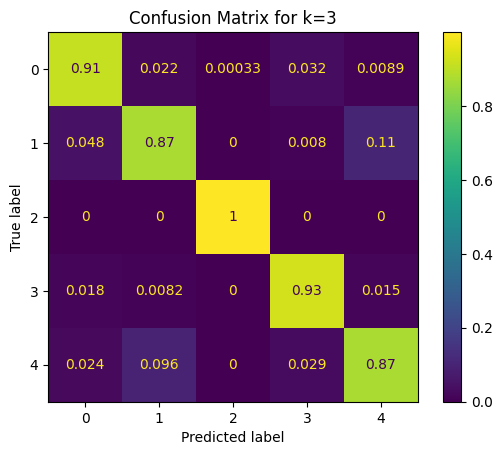

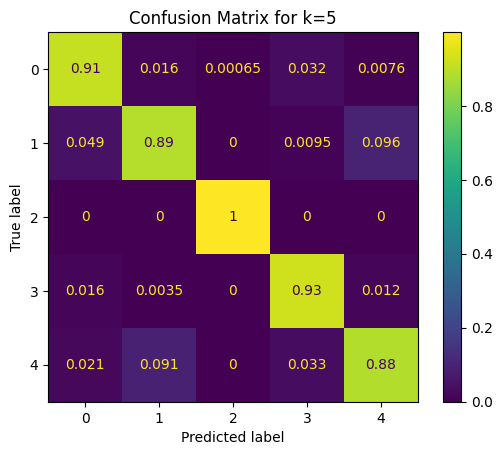

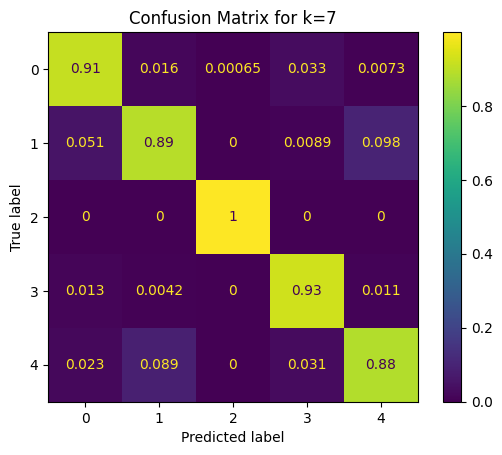

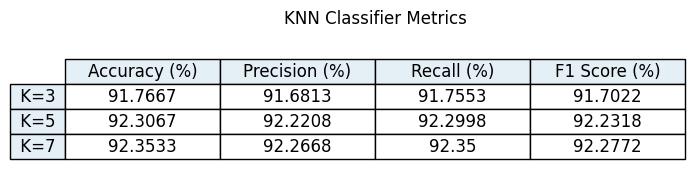

In [30]:
def knn_classifier(k):
    # Create a pipeline with an imputer and the kNN classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train the classifier
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1_score_value = get_metric_values(y_test, y_pred)
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(f'Confusion Matrix for k={k}')
    # Show it
    plt.show()

    # Create a table with metrics
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    return values


k_values = [3, 5, 7]
knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = knn_classifier(k)
    knn_values.append(values)

show_table(knn_values, [f" K={k} " for k in k_values], "KNN Classifier Metrics")

##### **Weighted k-Nearest Neighbor**

- **Concept**   
    Weighted K-Nearest Neighbors (KNN) is a variation of the *KNN algorithm* where *each neighbor’s contribution to the prediction is weighted based on its distance* to the query point. Closer neighbors have *higher influence* than farther ones.

- **How it works**   
    1. Choose the number of neighbors, *k*.
    2. Calculate the *distance* between the new data point and all other data points in the dataset.
    3. Identify the *k closest neighbors*.
    4. Assign *weights* to the neighbors — typically, the weight is *inversely proportional to the distance* (e.g., weight = 1/distance). This way, closer points contribute more.
    5. For *classification, the predicted class is determined using a **weighted vote* (closer neighbors count more than farther ones).
    6. For *regression, the predicted value is the **weighted average* of the k neighbors' values.

- **Advantages**    
    - More *flexible and accurate* than standard KNN, especially when neighbors are not uniformly distributed.
    - Helps to reduce the impact of *distant outliers* compared to unweighted KNN.
    - Simple to understand and implement.

- **Disadvantages** 
    - Still *computationally expensive* for large datasets.
    - Requires tuning of *k* and choosing an appropriate *distance metric*.
    - Sensitive to irrelevant or redundant features.


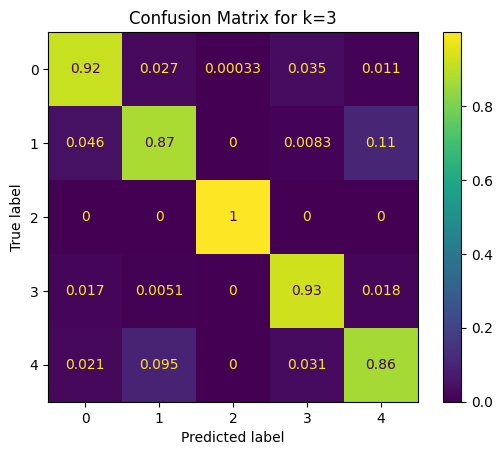

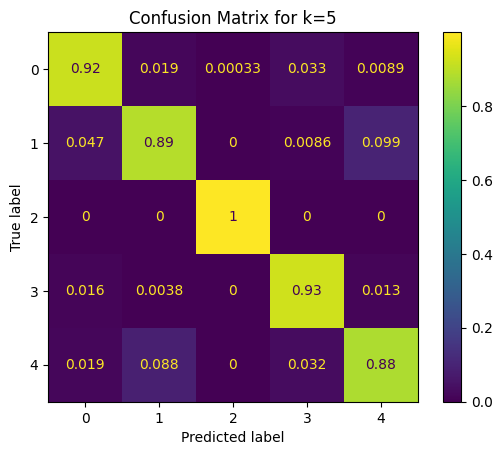

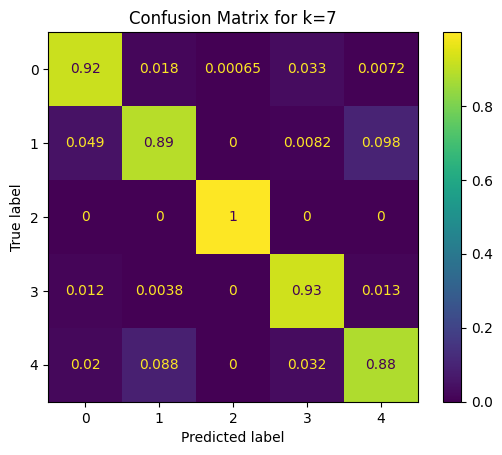

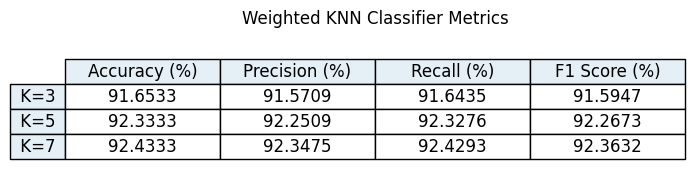

In [ ]:
def weighted_knn_classifier(k):
    # Create a pipeline with an imputer and the weighted kNN classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('wknn', KNeighborsClassifier(n_neighbors=k, weights='distance'))
    ])

    # Train the classifier
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1_score_value = get_metric_values(y_test, y_pred)
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(f'Confusion Matrix for k={k}')
    # Show it
    plt.show()

    # Create a table with metrics
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    return values


k_values = [3, 5, 7]
weighted_knn_values = []
# run with k=3, k=5, k=7
for k in k_values:
    values = weighted_knn_classifier(k)
    weighted_knn_values.append(values)

show_table(weighted_knn_values, [f" K={k} " for k in k_values], "Weighted KNN Classifier Metrics")

##### **Naive Bayes**

- **Concept**  
    Naive Bayes is a probabilistic algorithm based on **Bayes' Theorem**, which calculates the probability of a class given some features. It assumes that all features are **independent** (the "naive" assumption), which simplifies the calculation.

- **How it works**  
    1. **Calculate prior probabilities**: The overall probability of each class in the training data.
    2. **Calculate likelihoods**: For each feature, calculate the probability of that feature value occurring within each class.
    3. **Apply Bayes' Theorem**: Combine the prior probabilities and likelihoods to calculate the **posterior probability** for each class.
    4. **Classify**: Assign the data point to the class with the highest posterior probability.

- **Advantages**  
    - Fast to train and predict.
    - Works well with high-dimensional data.
    - Simple to implement.
    - Performs surprisingly well even with the unrealistic independence assumption.

- **Disadvantages**  
    - Relies heavily on the independence assumption, which is rarely true in real-world data.
    - Struggles with datasets where features have strong correlations.



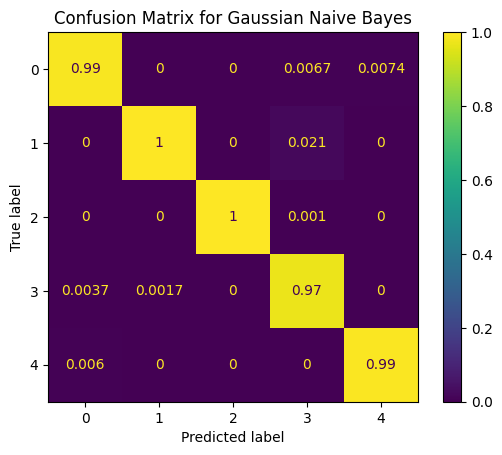

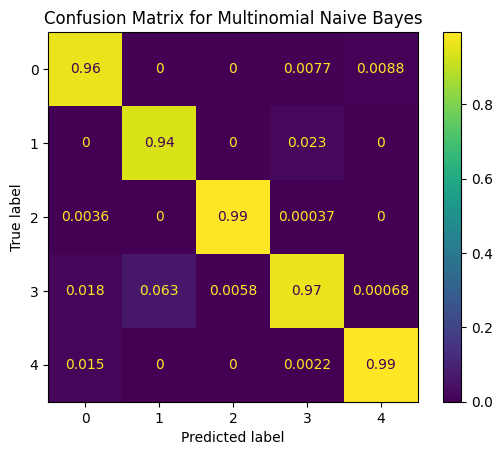

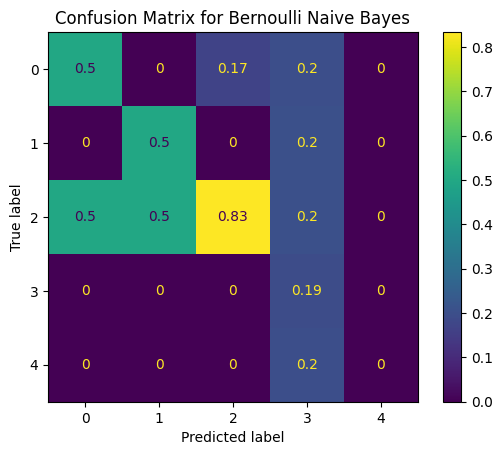

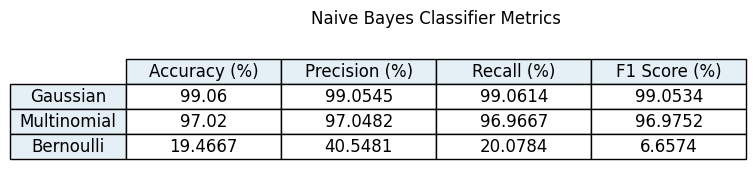

In [71]:
nb_values = [GaussianNB(), MultinomialNB(), BernoulliNB()]
nb_names = ["Gaussian", "Multinomial", "Bernoulli"]

def naive_bayes_classifier(nb_type):
    # Create a pipeline with an imputer, scaler, and the Naive Bayes classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', MinMaxScaler()),
        ('nb', nb_type)
    ])

    # Train the classifier
    try:
        pipeline.fit(X_train, y_train)
    except ValueError as e:
        print(f"Error: {e}", nb_type)
        return None

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1_score_value = get_metric_values(y_test, y_pred)
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(f'Confusion Matrix for {nb_names[nb_values.index(nb_type)]} Naive Bayes')
    # Show it
    plt.show()

    # Create a table with metrics
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    return values


nb_values_values = []
# run with Gaussian, Multinomial, Bernoulli
for nb, name in zip(nb_values, nb_names):
    values = naive_bayes_classifier(nb)
    if values:
        nb_values_values.append(values)
    else:
        print(f"Skipping {name} due to error.")

show_table(nb_values_values, nb_names, "Naive Bayes Classifier Metrics")


##### **Random Forest**

- **Concept**  
    Random Forest is an **ensemble learning algorithm** that combines multiple decision trees to improve prediction accuracy and reduce overfitting. Each tree is trained on a random subset of the data (both rows and columns), and the final prediction is made by averaging (for regression) or majority voting (for classification) across all trees.

- **How it works**  
    1. **Bootstrap sampling**: Randomly select subsets of the training data (with replacement) to train each tree.
    2. **Feature selection**: For each split in a tree, only a random subset of features is considered (this adds diversity).
    3. **Tree construction**: Each decision tree is grown independently, often to full depth.
    4. **Prediction**: For classification, each tree "votes" for a class, and the majority vote is the final prediction. For regression, predictions from all trees are averaged.

- **Advantages**  
    - Handles both classification and regression tasks.
    - **Reduces overfitting** by averaging multiple trees.
    - Handles missing data and categorical variables well.
    - Works well with large datasets and high-dimensional spaces.
    - Provides feature importance scores.

- **Disadvantages**  
    - Can be slower to train and predict compared to simpler models.
    - Large forests can require significant memory.
    - Predictions are less interpretable than a single decision tree.

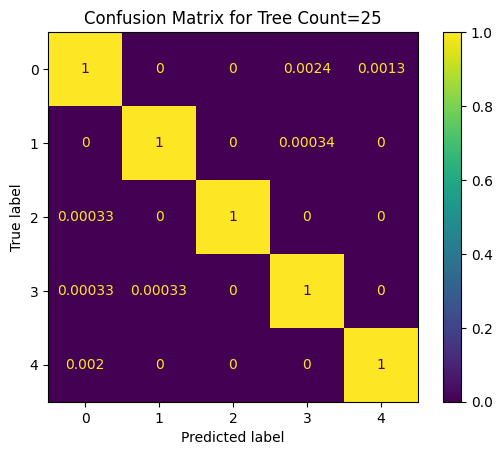

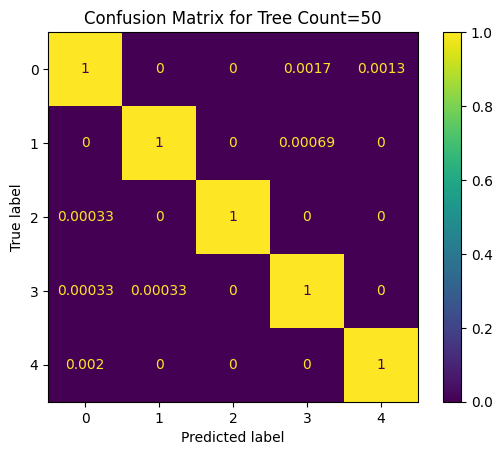

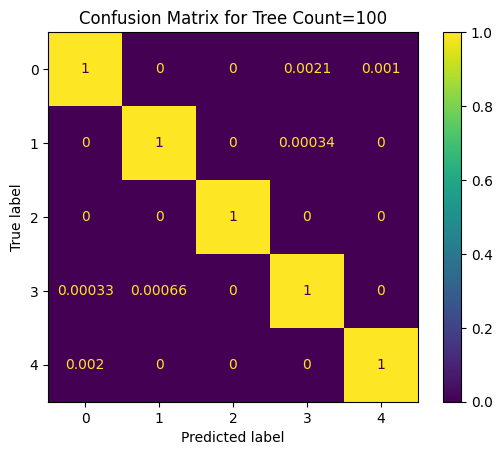

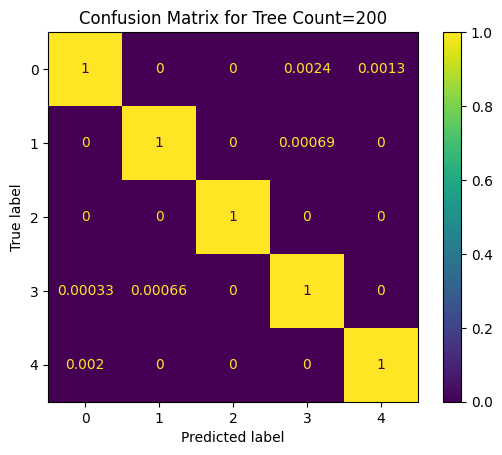

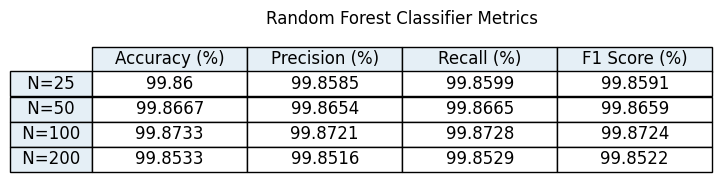

In [ ]:
def random_forest_classifier(n):
    # Create a pipeline with an imputer and the weighted kNN classifier
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('rfc', RandomForestClassifier(n_estimators = n))
    ])

    # Train the classifier
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Calculate metrics
    accuracy, precision, recall, f1_score_value = get_metric_values(y_test, y_pred)
    
    # Confusion matrix
    matrix = confusion_matrix(y_test, y_pred, normalize="pred")
    disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
    # Plot it with title
    disp.plot()
    plt.title(f'Confusion Matrix for Tree Count={n}')
    # Show it
    plt.show()

    # Create a table with metrics
    values = [round(accuracy * 100, 4), round(precision * 100, 4), round(recall * 100, 4), round(f1_score_value * 100, 4)]
    return values


n_values = [25, 50, 100, 200]
random_forest_values = []
# run with k=3, k=5, k=7
for n in n_values:
    values = random_forest_classifier(n)
    random_forest_values.append(values)

show_table(random_forest_values, [f" N={n} " for n in n_values], "Random Forest Classifier Metrics")

##### **Support Vector Machines(SVM)**

- **Concept**  
    Support Vector Machine (SVM) is a **supervised learning algorithm** used for both **classification** and **regression** tasks, although it is more commonly used for classification. SVM works by finding the **optimal hyperplane** that best separates data points of different classes in a high-dimensional space.

- **How it works**  
    1. SVM identifies the hyperplane that maximizes the **margin** (distance) between data points of different classes.
    2. Only the **support vectors** — the data points closest to the hyperplane — are used to define the position and orientation of the hyperplane.
    3. For **linearly separable data**, a straight line (in 2D) or flat hyperplane (in higher dimensions) separates the classes.
    4. For **non-linearly separable data**, SVM uses the **kernel trick** to map data into a higher-dimensional space where a linear separation is possible.

- **Advantages**  
    - Effective for **high-dimensional data** (many features).
    - Works well when there is a **clear margin of separation** between classes.
    - **Robust to overfitting** if the number of features is greater than the number of samples.
    - Can handle both **linear and non-linear classification** using different **kernels** (linear, polynomial, RBF, etc.).

- **Disadvantages**  
    - **Memory-intensive** and slow for large datasets.
    - Performance depends heavily on the **choice of kernel** and **hyperparameters** (C and gamma).
    - Less interpretable than simpler models like decision trees.

- **Common Uses**  
    - **Image classification**.
    - **Text categorization** (e.g., spam detection, sentiment analysis).
    - **Bioinformatics** (e.g., protein classification).

- **Key Parameters**  
    - `C`: Regularization parameter, controls the trade-off between achieving a low error on training data and maximizing the margin.
    - `Kernel`: Defines the transformation applied to the data (linear, polynomial, RBF, sigmoid).
    - `Gamma`: Controls how far the influence of a single training point reaches (for RBF and polynomial kernels).

### **References**

- [KNN - Geeks for Geeks](https://www.geeksforgeeks.org/k-nearest-neighbours/) - Access Date: 03/03/2025
- [Weighted KNN - Geeks for Geeks](https://www.geeksforgeeks.org/weighted-k-nn/) - Access Date: 03/03/2025
- [Naive Bayes - Geeks for Geeks](https://www.geeksforgeeks.org/naive-bayes-classifiers/) - Access Date: 03/03/2025
- [Random Forest - Geeks for Geeks](https://www.geeksforgeeks.org/random-forest-classifier-using-scikit-learn/) - Access Date: 03/03/2025
- [Suppoer Vector Machine - Geeks for Geeks](https://www.geeksforgeeks.org/support-vector-machine-algorithm/) - Access Date: 03/03/2025
- [Simple Table - Medium](https://medium.com/towards-data-science/simple-little-tables-with-matplotlib-9780ef5d0bc4/) - Access Date: 03/03/2025